<a href="https://colab.research.google.com/github/jjbarrs/Proyecto-SP1-AI/blob/master/ProyectoSP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<marquee style='width:100%; color: red; '><h1 style='color:black;'><b>Proyecto Seminario Profesional 1 - Dermatología</b></h1></marquee>



---



**INTEGRANTES**

José Javier Barrios Velésquez - 21000478

Juan Ramón Rivas Terraza - 20000665

Cristopher Alejandro Azurdia de León - 21000232



---



**INTRODUCCION**

A continuacion se encotraran nuestros modelos de IA entrenados, la estructura es la siguiente:



*   Cargando el dataset: este punto solo nos enfocamos en cargar los datasets y en analizar a grandes rasgos que preprocesing se debe de realizar, al final de este punto se colocan conlcusiones en base a lo observado y cuales seran los puntos a tener en cuenta en el preprocess
*   MODELOS: a partir de este punto se encontraran 3 modelos diferentes tanto en algun tipo de preprocess asi como tambien en el propio entrenamiento.
*   Conclusiones: en este punto se tomara en cuenta los resultados de los modelos realizados y se buscara cual es el mejor.







---



# 0) Librerias

In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf


# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
%load_ext tensorboard
%mkdir logs & rm -rf ./logs/

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# 1) Cargando el dataset

In [ ]:
#cargando el dataset de la pagina y descomprimiento el zip que descarga
!wget https://archive.ics.uci.edu/static/public/33/dermatology.zip
!unzip dermatology.zip -d dermatology

--2024-06-06 19:14:16--  https://archive.ics.uci.edu/static/public/33/dermatology.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dermatology.zip’

dermatology.zip         [ <=>                ]   5.98K  --.-KB/s    in 0s      

2024-06-06 19:14:16 (78.7 MB/s) - ‘dermatology.zip’ saved [6119]

Archive:  dermatology.zip
  inflating: dermatology/dermatology.data  
  inflating: dermatology/dermatology.names  


## 1.1) ordenando los datos

In [ ]:
# Cargando el dataset dentro de una variable utilizable y estructurando los nombres de las columnas
column_names = ['erythema','scaling','definite','itching','koebner',
                'polygonal', 'follicular-papules', 'oral-mucosal', 'knee',
                'scalp', 'family','melanin','eosinophils','pnl',
                'fibrosis', 'exocytosis','acanthosis','hyperkeratosis',
                'parakeratosis','clubbing','elongation', 'thinning',
                'spongiform', 'munro', 'focal','disappearance',
                'vacuolisation','spongiosis','saw-tooth', 'follicular-horn',
                'perifollicular', 'inflammatory', 'band-like', 'age', 'class'
                ]

raw_dataset = pd.read_csv("./dermatology/dermatology.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)
raw_dataset

,erythema,scaling,definite,itching,koebner,polygonal,follicular-papules,oral-mucosal,knee,scalp,...,disappearance,vacuolisation,spongiosis,saw-tooth,follicular-horn,perifollicular,inflammatory,band-like,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


## 1.2) analizando los datos


In [ ]:
#observando como se distribuye la data (esto se ve mejor en la info dentro de la pagina del dataset)
raw_dataset.describe()

,erythema,scaling,definite,itching,koebner,polygonal,follicular-papules,oral-mucosal,knee,scalp,...,disappearance,vacuolisation,spongiosis,saw-tooth,follicular-horn,perifollicular,inflammatory,band-like,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [ ]:
#observando los tipos de datos de cada paramentro con el fin de encotrar alguno a mapear
raw_dataset.dtypes

erythema                int64
scaling                 int64
definite                int64
itching                 int64
koebner                 int64
polygonal               int64
follicular-papules      int64
oral-mucosal            int64
knee                    int64
scalp                   int64
family                  int64
melanin                 int64
eosinophils             int64
pnl                     int64
fibrosis                int64
exocytosis              int64
acanthosis              int64
hyperkeratosis          int64
parakeratosis           int64
clubbing                int64
elongation              int64
thinning                int64
spongiform              int64
munro                   int64
focal                   int64
disappearance           int64
vacuolisation           int64
spongiosis              int64
saw-tooth               int64
follicular-horn         int64
perifollicular          int64
inflammatory            int64
band-like               int64
age       

In [ ]:
#observando el shape y la cantidad de datos
raw_dataset.shape

(366, 35)

## 1.3) Conclusiones y a Realizar

de los datos podemos inferir lo siguiente:
- no existen datos de tipo object por lo tanto no se debera de mapear
- la edad esta fuera del rango del resto por lo tanto debemos de normalizar ese paramentro.
- por otro lado la cantidad de inputs seran 34 ya que 1 es la clasificacion.
- la cantidad de outputs son 6 ya que son 6 clases.
- en la pagina del dataset, se observo que una clase contiene missing values, por lo tanto se debe de arreglar.
- las calses no estan bien balanceadas, por los tanto, debemos de hacer crear data sintetica.



---



# 2) Pre-process

## 2.1)Missing Values

In [ ]:
#Explorando el dataset en su pagina: https://archive.ics.uci.edu/dataset/33/dermatology
#observamos que existian missing values en la edad, por lo tanto se deberan de eliminar
def missing_values_cleanup(dataset):
  new_dataset = dataset.copy()
  new_dataset = new_dataset.dropna()
  print(new_dataset.isna().sum())
  return new_dataset

dataset_missingnt = missing_values_cleanup(dataset=raw_dataset)

erythema              0
scaling               0
definite              0
itching               0
koebner               0
polygonal             0
follicular-papules    0
oral-mucosal          0
knee                  0
scalp                 0
family                0
melanin               0
eosinophils           0
pnl                   0
fibrosis              0
exocytosis            0
acanthosis            0
hyperkeratosis        0
parakeratosis         0
clubbing              0
elongation            0
thinning              0
spongiform            0
munro                 0
focal                 0
disappearance         0
vacuolisation         0
spongiosis            0
saw-tooth             0
follicular-horn       0
perifollicular        0
inflammatory          0
band-like             0
age                   0
class                 0
dtype: int64


## 2.2) Normalización

In [ ]:
def normalize_min_max(column):
  max_value = np.max(column)
  min_value = np.min(column)
  return (column - min_value)/(max_value - min_value)

def normalize_columns(dataset, columns):
  new_dataset = dataset.copy()
  for column in columns:
    new_dataset[column] = normalize_min_max(new_dataset[column])
  return new_dataset

In [ ]:
normalizacion_dataset = dataset_missingnt.copy()
normalizacion_dataset = normalize_columns(dataset=normalizacion_dataset, columns=["age"])

##2.3) DATA SINTETICA


Class code:     Class:                     Number of instances:

       1      psoriasis			            112
       2      seboreic dermatitis              61
       3      lichen planus                    72
       4      pityriasis rosea                 49
       5      ronic dermatitis                 52    
       6      pityriasis rubra pilaris         20

In [ ]:
#De la informacion anterior nos damos cuenta que el dataset no esta bien balanceado
#por lo tanto se debera de ralizar oversampling o undersampling
#se decidio utilizar oversampling debido a que tenemos una poca cantidad de datos reales y eliminar con undersampling
#nos parecio algo que no valia la pena realizar.

In [ ]:
dataset_1 = normalizacion_dataset.copy()

class 2 :  60
class 1 :  111
class 3 :  71
class 5 :  48
class 4 :  48
class 6 :  20


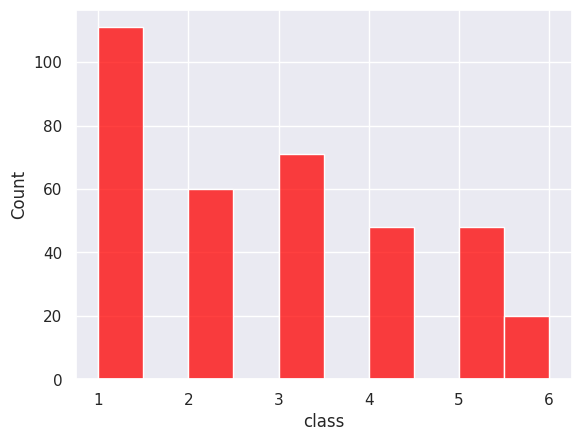

In [ ]:
for i in dataset_1["class"].unique():
  numRows = len(dataset_1[dataset_1['class'] == i])
  print("class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=dataset_1, x="class", color="red")
plt.show()

In [ ]:
values = dataset_1['class'].value_counts()
values

class
1    111
3     71
2     60
5     48
4     48
6     20
Name: count, dtype: int64

In [ ]:
# Lets extract how many classes there are in class '2'
class_one_count = values[1]

# Lets undersample the data that belongs to class '0'
over_class_two = dataset_1[dataset_1['class'] == 2].sample(class_one_count, replace=True)
over_class_three = dataset_1[dataset_1['class'] == 3].sample(class_one_count, replace=True)
over_class_four = dataset_1[dataset_1['class'] == 4].sample(class_one_count, replace=True)
over_class_five = dataset_1[dataset_1['class'] == 5].sample(class_one_count, replace=True)
over_class_six = dataset_1[dataset_1['class'] == 6].sample(class_one_count, replace=True)

In [ ]:
# Lets extract all the data with class '1'
class_one_dataset = dataset_1[dataset_1['class'] == 1]

# Lets merge both datasets
oversampled_dataset = pd.concat([class_one_dataset, over_class_two, over_class_three, over_class_four, over_class_five, over_class_six])

# Lets shuffle the dataset
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

# Lets preview
oversampled_dataset

,erythema,scaling,definite,itching,koebner,polygonal,follicular-papules,oral-mucosal,knee,scalp,...,disappearance,vacuolisation,spongiosis,saw-tooth,follicular-horn,perifollicular,inflammatory,band-like,age,class
0,3,3,2,0,0,0,0,0,2,2,...,1,0,0,0,0,0,2,0,0.733333,1
1,2,1,1,1,0,0,2,0,3,2,...,0,0,0,0,0,1,1,1,0.160000,6
2,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,0.666667,3
3,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0.466667,5
4,2,2,2,1,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0.453333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,2,1,0.533333,5
662,1,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0.333333,4
663,1,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0.333333,4
664,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.800000,5


class 1 :  111
class 6 :  111
class 3 :  111
class 5 :  111
class 2 :  111
class 4 :  111


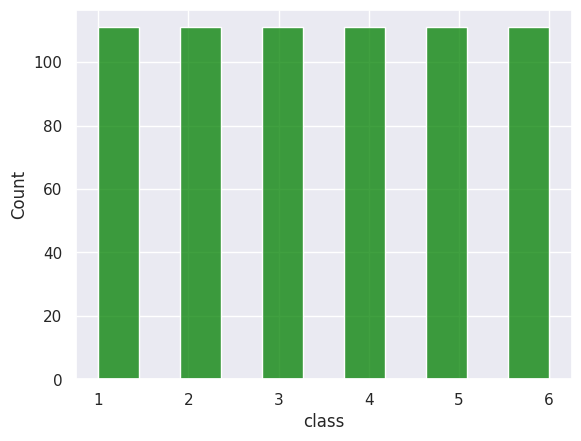

In [ ]:
for i in oversampled_dataset["class"].unique():
  numRows = len(oversampled_dataset[oversampled_dataset['class'] == i])
  print("class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=oversampled_dataset, x="class", color="green")
plt.show()



---



# 3) MODELOS

En este punto se separan en dataset de entrenamiento y de test para poder realizar correctamente las verificaciones

In [ ]:
#por la regla separamos con 80 20
train, test = train_test_split(oversampled_dataset, test_size=0.2)

# separar las variables dependientes e independientes
independent_variables = list(oversampled_dataset.columns)
independent_variables.remove('class')
dependent_variables = ['class']

#separar los datos en test y entrenamiento
train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
print(np.unique(train_target))

[1 2 3 4 5 6]


Del unique anterior podemos inferir dos cosas, la primera es que los datos de las clases van de 1 a 6 pero tenserflow no permite analisar estos datos, por lo tanto para reparar esto debemos de cambiarlos de 0 a 5

In [ ]:
train_target = np.array(train_target)

# Restar 1 a todas las etiquetas para que vayan de 0 a 5
train_target -= 1

# verificacion
print(np.unique(train_target))

[0 1 2 3 4 5]


In [ ]:
test_target = np.array(test_target)

# Restar 1 a todas las etiquetas para que vayan de 0 a 5
test_target -= 1

# verificacion
print(np.unique(test_target))

[0 1 2 3 4 5]


## 3.1) MODELO 1

### 3.1.1) Callbacks

In [ ]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4,)

In [ ]:
print(train_set.shape)

(532, 34)


### 3.1.2) AI MODEL

In [ ]:

modelo1 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(34)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='softmax')
  ])

# Compilando
modelo1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Nentrenando
modelo1.fit(train_set,
          train_target,
          epochs=100,
          batch_size = 128 ,
          validation_split=0.2,
          callbacks=[earlystopping_callback]
        )

Epoch 1/100
4/4 [==============================] - 2s 235ms/step - loss: 1.9040 - accuracy: 0.1718 - val_loss: 1.7780 - val_accuracy: 0.1589
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1.7472 - accuracy: 0.1835 - val_loss: 1.6655 - val_accuracy: 0.1776
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 1.6318 - accuracy: 0.2094 - val_loss: 1.5788 - val_accuracy: 0.2243
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 1.5375 - accuracy: 0.2565 - val_loss: 1.5070 - val_accuracy: 0.3271
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 1.4642 - accuracy: 0.3624 - val_loss: 1.4433 - val_accuracy: 0.4019
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 1.3955 - accuracy: 0.4400 - val_loss: 1.3823 - val_accuracy: 0.4953
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 1.3288 - accuracy: 0.5553 - val_loss: 1.3183 - val_accuracy: 0.5888
Epoch 8/100
4/4 [==

In [ ]:
modelo1.evaluate(x=test_set, y=test_target, batch_size=128)

2/2 [==============================] - 0s 11ms/step - loss: 0.0486 - accuracy: 0.9925


[0.04858610779047012, 0.9925373196601868]

In [ ]:
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(12, 12))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

5/5 [==============================] - 0s 5ms/step


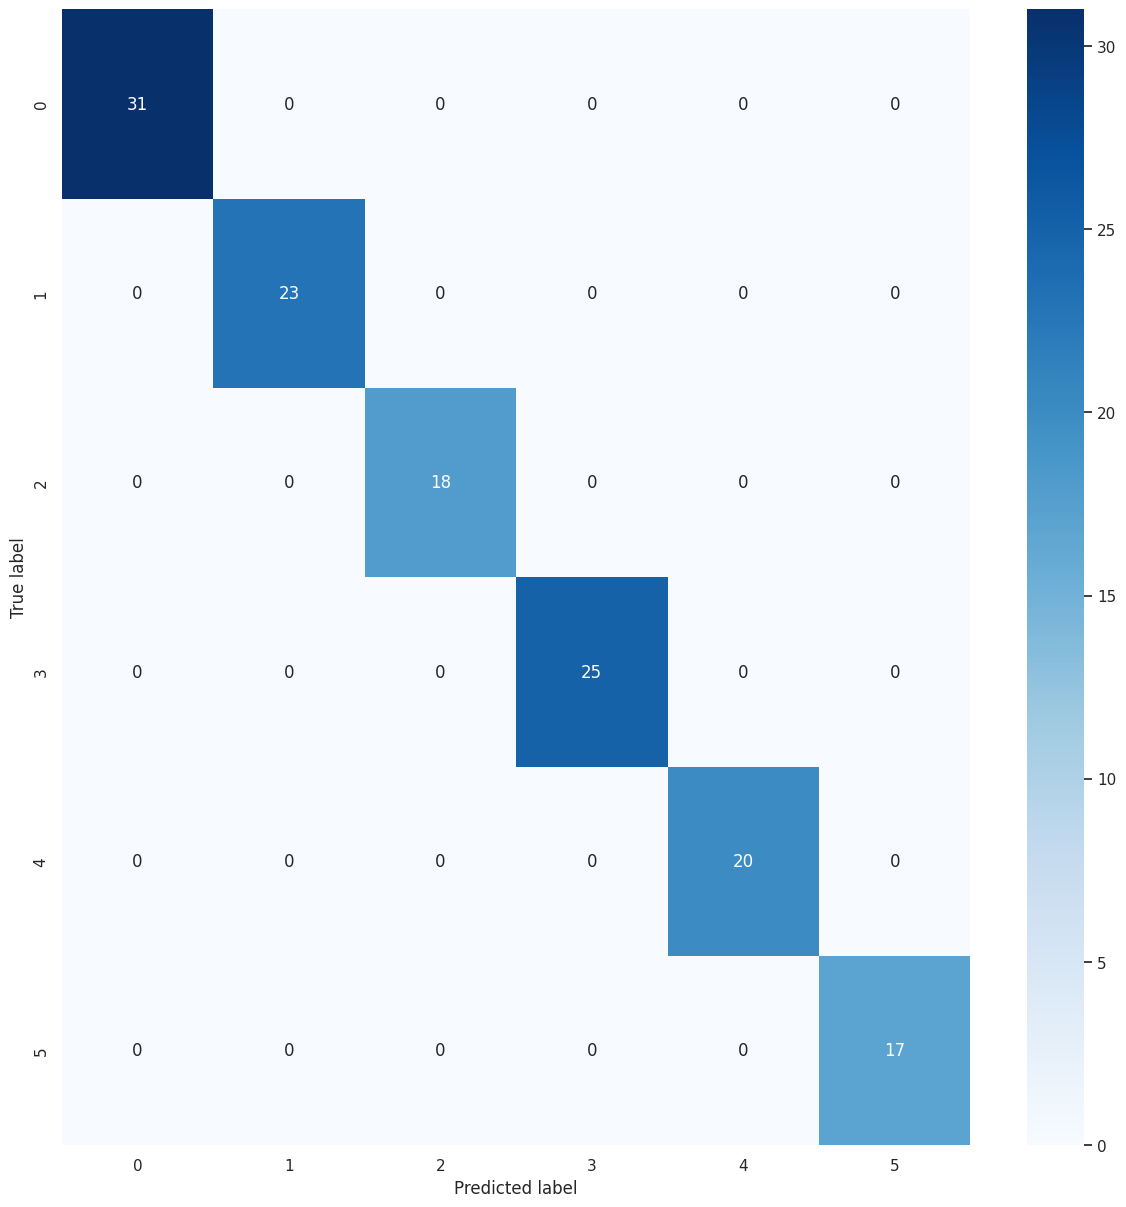

In [ ]:
predictions = modelo1.predict(x=test_set)
predictions = list(map(lambda x: np.argmax(x), predictions))

plot_confusion_matrix(labels=test_target, predictions=predictions)

## 3.2)MODELO 2


In [ ]:
modelo2 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(34)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='softmax')
  ])

# Compilando
modelo2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Nentrenando
modelo2.fit(train_set,
          train_target,
          epochs=80,
          batch_size = 128 ,
          validation_split=0.2,
          callbacks=[earlystopping_callback]
        )

Epoch 1/80
4/4 [==============================] - 2s 119ms/step - loss: 1.7902 - accuracy: 0.1576 - val_loss: 1.7608 - val_accuracy: 0.1963
Epoch 2/80
4/4 [==============================] - 0s 49ms/step - loss: 1.7473 - accuracy: 0.2588 - val_loss: 1.7260 - val_accuracy: 0.2991
Epoch 3/80
4/4 [==============================] - 0s 39ms/step - loss: 1.7088 - accuracy: 0.3435 - val_loss: 1.6916 - val_accuracy: 0.2991
Epoch 4/80
4/4 [==============================] - 0s 38ms/step - loss: 1.6721 - accuracy: 0.3529 - val_loss: 1.6530 - val_accuracy: 0.3364
Epoch 5/80
4/4 [==============================] - 0s 11ms/step - loss: 1.6314 - accuracy: 0.3741 - val_loss: 1.6064 - val_accuracy: 0.3458
Epoch 6/80
4/4 [==============================] - 0s 11ms/step - loss: 1.5820 - accuracy: 0.4235 - val_loss: 1.5490 - val_accuracy: 0.4019
Epoch 7/80
4/4 [==============================] - 0s 11ms/step - loss: 1.5216 - accuracy: 0.4518 - val_loss: 1.4798 - val_accuracy: 0.4673
Epoch 8/80
4/4 [==========

In [ ]:
modelo2.evaluate(x=test_set, y=test_target, batch_size=128)

2/2 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9776


[0.08701800554990768, 0.9776119589805603]

5/5 [==============================] - 0s 2ms/step


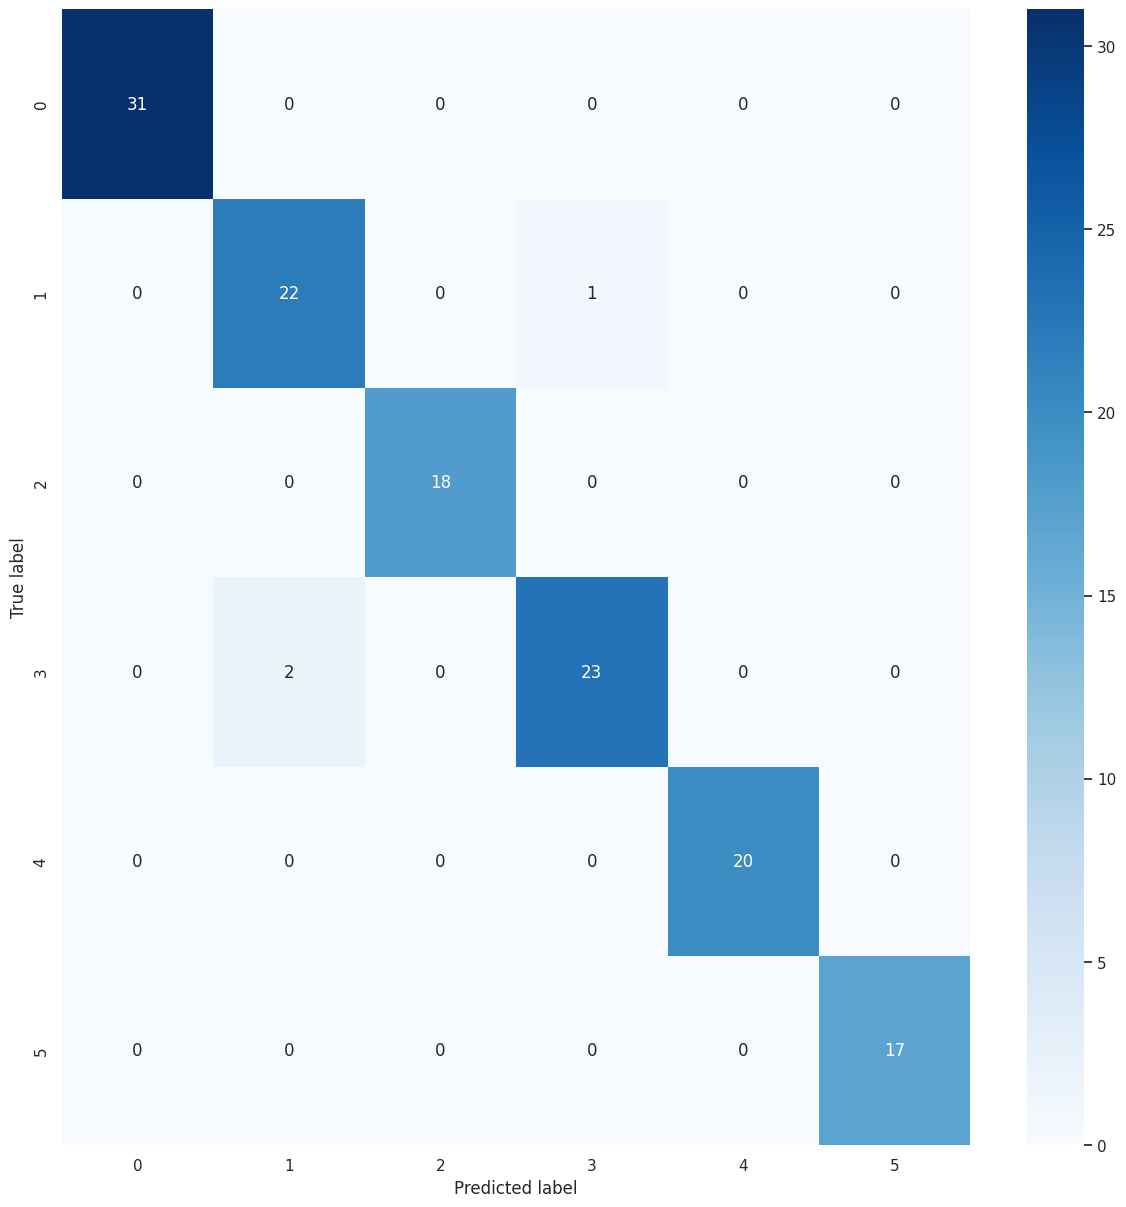

In [ ]:
predictions = modelo2.predict(x=test_set)
predictions = list(map(lambda x: np.argmax(x), predictions))

plot_confusion_matrix(labels=test_target, predictions=predictions)

## 3.3) MODELO 3

Este modelo decidimos probar a realizar undersampling y oversampling, por este motivo relizaremos un poco mas de preprocess

In [ ]:
dataset_2 = normalizacion_dataset.copy()

In [ ]:
values2 = dataset_2['class'].value_counts()
values2

class
1    111
3     71
2     60
5     48
4     48
6     20
Name: count, dtype: int64

In [ ]:

class_one_count2 = values[3]

# este caso solo a la clase 1 realizaremos undersampling y el resto lo trabajaremos con oversampling
over_class_two2 = dataset_2[dataset_2['class'] == 2].sample(class_one_count2, replace=True)
over_class_three2 = dataset_2[dataset_2['class'] == 1].sample(class_one_count2, replace=False)
over_class_four2 = dataset_2[dataset_2['class'] == 4].sample(class_one_count2, replace=True)
over_class_five2 = dataset_2[dataset_2['class'] == 5].sample(class_one_count2, replace=True)
over_class_six2 = dataset_2[dataset_2['class'] == 6].sample(class_one_count2, replace=True)

In [ ]:
class_one_dataset2 = dataset_2[dataset_2['class'] == 3]

# Lets merge both datasets
oversampled_dataset2 = pd.concat([class_one_dataset2, over_class_two2, over_class_three2, over_class_four2, over_class_five2, over_class_six2])

# Lets shuffle the dataset
oversampled_dataset2 = oversampled_dataset2.sample(frac=1).reset_index(drop=True)

# Lets preview
oversampled_dataset2

,erythema,scaling,definite,itching,koebner,polygonal,follicular-papules,oral-mucosal,knee,scalp,...,disappearance,vacuolisation,spongiosis,saw-tooth,follicular-horn,perifollicular,inflammatory,band-like,age,class
0,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0.333333,4
1,2,2,2,2,2,0,0,0,0,2,...,2,0,0,0,0,0,2,0,0.613333,1
2,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0.800000,1
3,2,2,3,2,3,3,0,3,0,0,...,0,2,2,2,0,0,2,2,0.533333,3
4,2,2,3,0,0,0,0,0,2,2,...,2,0,0,0,0,0,2,0,0.440000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,2,2,2,1,2,0,2,0,0,...,0,2,3,2,0,0,2,3,0.480000,3
422,2,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0.693333,5
423,1,1,0,1,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,0.800000,4
424,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.440000,5


class 4 :  71
class 1 :  71
class 3 :  71
class 2 :  71
class 5 :  71
class 6 :  71


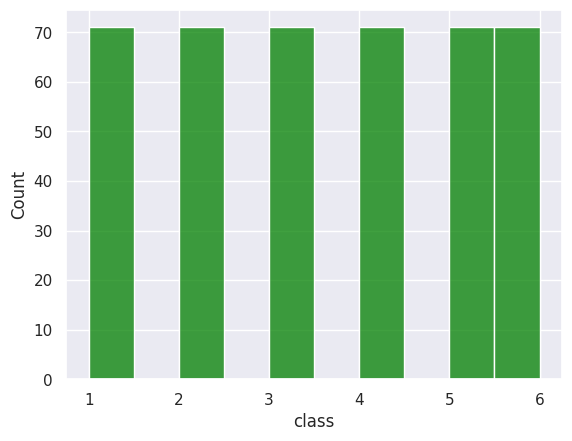

In [ ]:
for i in oversampled_dataset2["class"].unique():
  numRows = len(oversampled_dataset2[oversampled_dataset2['class'] == i])
  print("class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=oversampled_dataset2, x="class", color="green")
plt.show()

In [ ]:
train, test = train_test_split(oversampled_dataset2, test_size=0.2)


independent_variables = list(oversampled_dataset2.columns)
independent_variables.remove('class')
dependent_variables = ['class']


train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_target = np.array(train_target)

# Restar 1 a todas las etiquetas para que vayan de 0 a 5
train_target -= 1

# verificacion
print(np.unique(train_target))

[0 1 2 3 4 5]


In [ ]:
test_target = np.array(test_target)

# Restar 1 a todas las etiquetas para que vayan de 0 a 5
test_target -= 1

# verificacion
print(np.unique(test_target))

[0 1 2 3 4 5]


In [ ]:
modelo3 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(34)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='softmax')
  ])

# Compilando
modelo3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Nentrenando
modelo3.fit(train_set,
          train_target,
          epochs=100,
          batch_size = 128 ,
          validation_split=0.2,
          callbacks=[earlystopping_callback]
        )

Epoch 1/100
3/3 [==============================] - 2s 113ms/step - loss: 2.2113 - accuracy: 0.1471 - val_loss: 1.8911 - val_accuracy: 0.2059
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 2.0385 - accuracy: 0.1471 - val_loss: 1.8024 - val_accuracy: 0.2059
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 1.9157 - accuracy: 0.1471 - val_loss: 1.7356 - val_accuracy: 0.1912
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.8246 - accuracy: 0.1471 - val_loss: 1.6852 - val_accuracy: 0.2059
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 1.7524 - accuracy: 0.1544 - val_loss: 1.6410 - val_accuracy: 0.2353
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 1.6974 - accuracy: 0.1728 - val_loss: 1.6017 - val_accuracy: 0.2500
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 1.6495 - accuracy: 0.2022 - val_loss: 1.5643 - val_accuracy: 0.2794
Epoch 8/100
3/3 [==

In [ ]:
modelo3.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 [==============================] - 0s 112ms/step - loss: 0.1329 - accuracy: 0.9651


[0.13293886184692383, 0.9651162624359131]

3/3 [==============================] - 0s 5ms/step


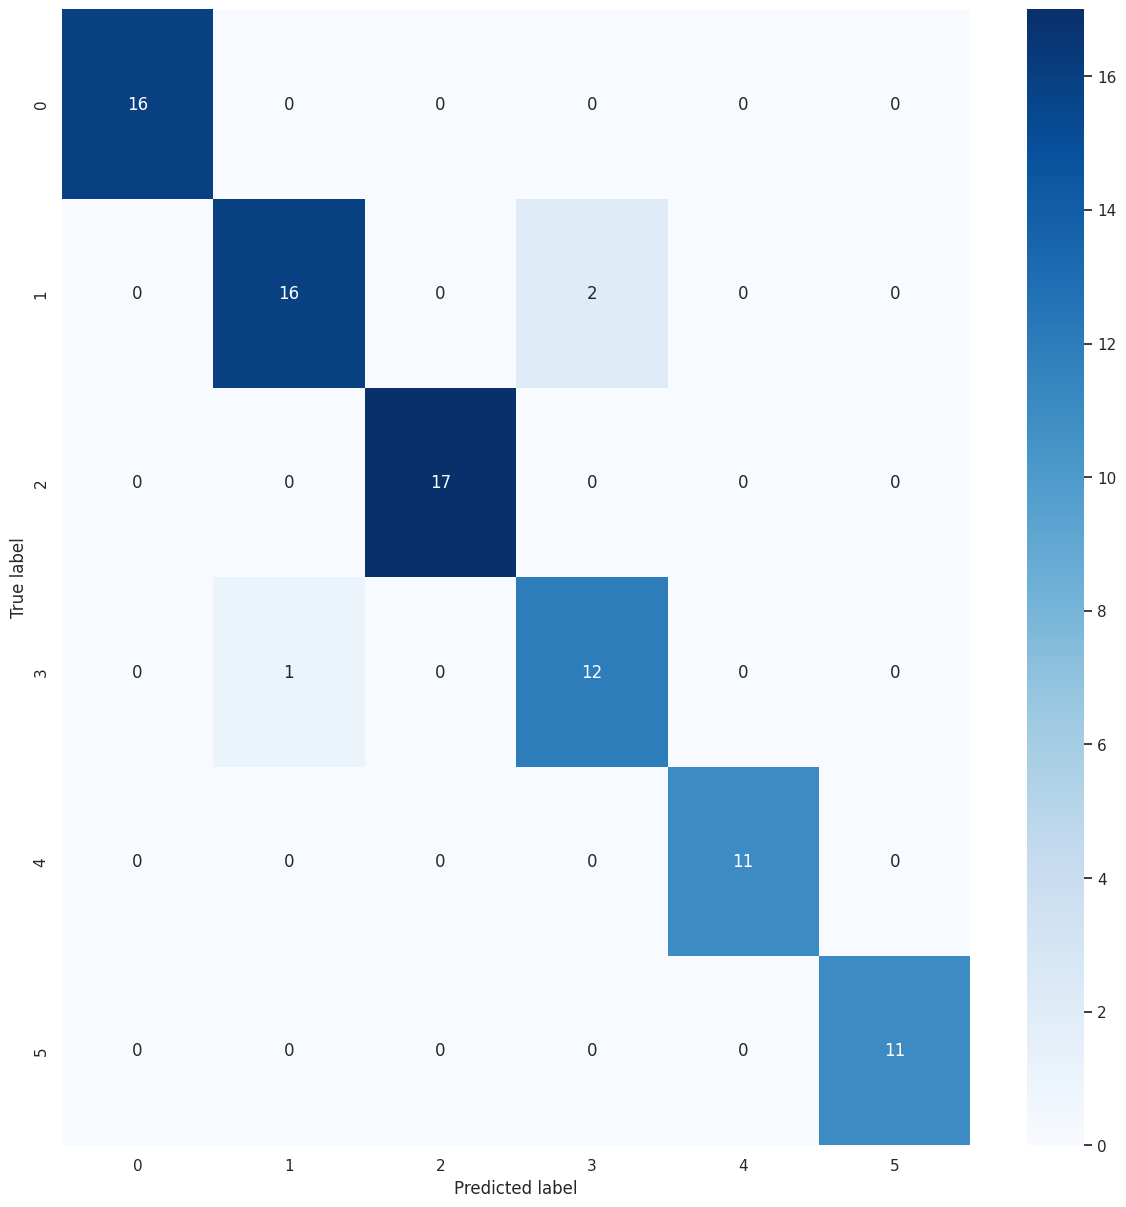

In [ ]:
predictions = modelo3.predict(x=test_set)
predictions = list(map(lambda x: np.argmax(x), predictions))

plot_confusion_matrix(labels=test_target, predictions=predictions)